In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[12,4]
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes.data, diabetes.target

diabetes_X=diabetes_X.loc[:,["bmi"]]

diabetes_X=diabetes_X*30+25

diabetes_X_train=diabetes_X.iloc[-20:]
diabetes_y_train=diabetes_y.iloc[-20:]

pd.concat([diabetes_X_train,diabetes_y_train], axis=1).head()


,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Text(0, 0.5, 'Diabetes Risk')

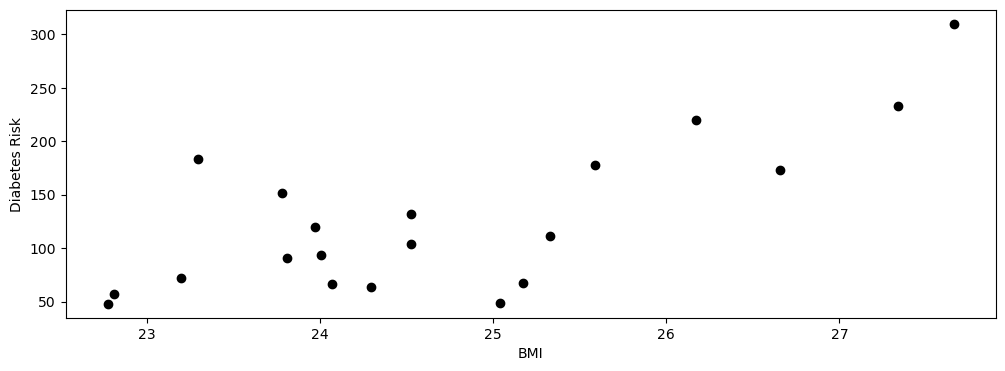

In [4]:
%matplotlib inline
plt.scatter(diabetes_X_train, diabetes_y_train, color="black")
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

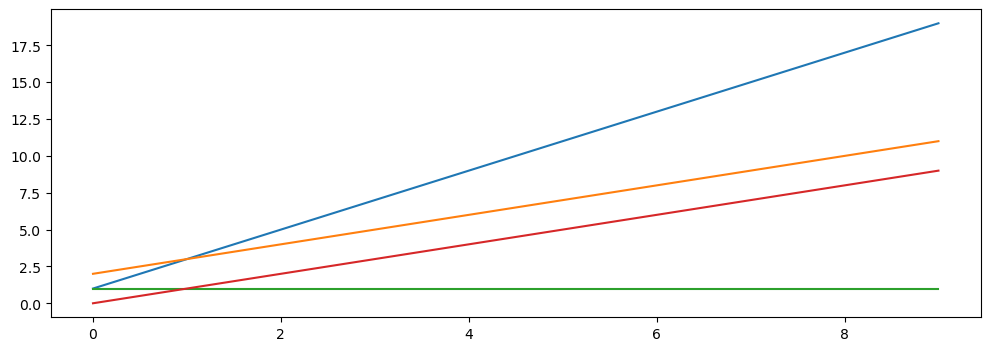

In [5]:
theta_list=[(1,2),(2,1),(1,0),(0,1)]

for theta0,theta1 in theta_list:
    x=np.arange(10)
    y=theta1*x+theta0
    plt.plot(x,y)

In [6]:
regr=linear_model.LinearRegression() #linear regresyon objesi oluştur

regr.fit(diabetes_X_train,diabetes_y_train.values) # model eğitimi

diabetes_y_train_pred=regr.predict(diabetes_X_train) #tahmin

print("Slope (thera1): \t",regr.coef_[0])
print("Intercept (theta0): \t",regr.intercept_)                    

Slope (thera1): 	 37.37884216052121
Intercept (theta0): 	 -797.0817390343262


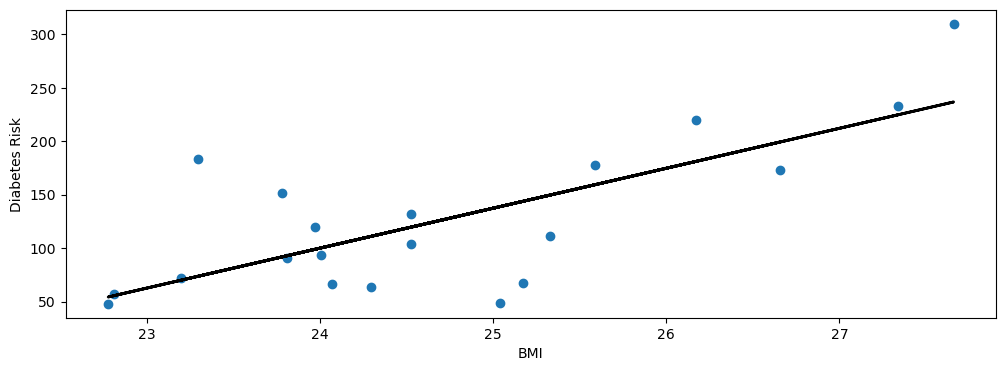

In [7]:
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(diabetes_X_train,diabetes_y_train)
plt.plot(diabetes_X_train,diabetes_y_train_pred, color="black",linewidth=2)

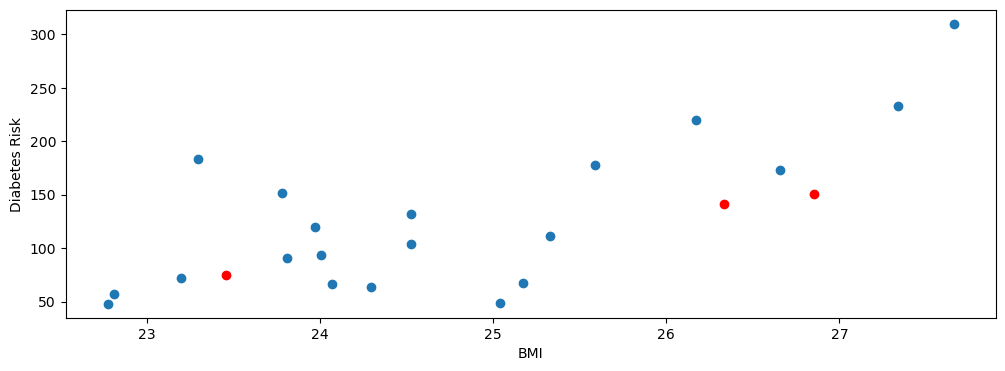

In [8]:
diabetes_X_test=diabetes_X.iloc[:3]
diabetes_y_test=diabetes_y.iloc[:3]

plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(diabetes_X_train,diabetes_y_train)
plt.scatter(diabetes_X_test,diabetes_y_test,color="red")



**Eğitim Verisi (Train) Noktaları:**
İlk olarak, modelin eğitildiği verideki hastaların BMI (Vücut Kitle İndeksi) ile diyabet riski arasındaki ilişki, yeşil noktalar kullanılarak görselleştirilmiştir. Bu noktalar, modelin gördüğü gerçek veriyi temsil eder.

**Test Verisi (Test) Noktaları:**
Daha sonra, modelin hiç görmediği test verisi üzerindeki hastaların gerçek BMI ve diyabet riskleri kırmızı daireler ile gösterilmiştir. Bu, yeni hastalar üzerindeki gerçek değerleri ifade eder.

**Modelin Öğrendiği İlişki (Regresyon Çizgisi):**
Eğitim verisi için modelin öğrendiği doğrusal ilişki, siyah bir çizgi ile gösterilmiştir. Bu çizgi, eğitim verisinde BMI ile diyabet riski arasındaki bağımsız değişken ve hedef değişken ilişkisini yansıtır.

**Test Verisi Tahminleri:**
Son olarak, modelin test verisindeki BMI değerleri için tahmin ettiği diyabet riskleri kırmızı çarpılar ile gösterilmiştir. Bu tahminler, modelin yeni veriler üzerinde nasıl performans gösterdiğini anlamamızı sağlar.








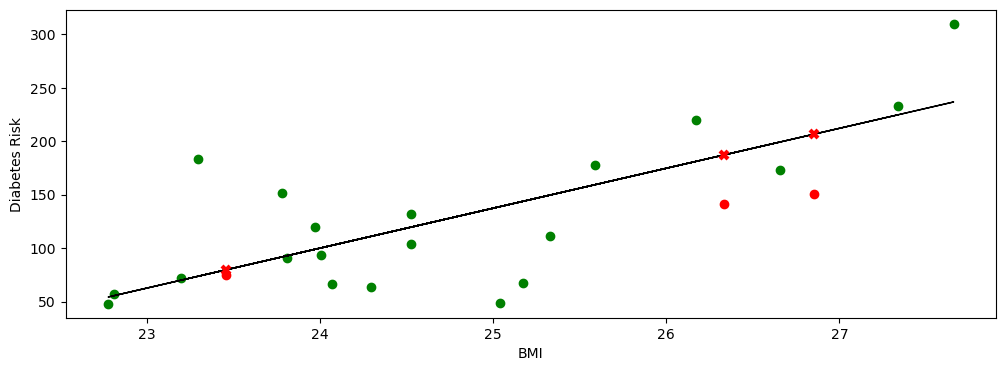

In [9]:
diabetes_y_test_pred=regr.predict(diabetes_X_test)

plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(diabetes_X_train,diabetes_y_train,color="green")
plt.scatter(diabetes_X_test,diabetes_y_test,color="red",marker="o")

plt.plot(diabetes_X_train, diabetes_y_train_pred, color="black", linewidth=1)
plt.plot(diabetes_X_test,diabetes_y_test_pred, "x",color="red", mew=3)

plt.legend=(["Model","Prediction","İnitial Patients","New Patients"])


In [10]:
diabetes_X,diabetes_y=diabetes.data,diabetes.target

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [11]:
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [12]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019907
s6    -0.017646
Name: 0, dtype: float64

## Attribute (Özellik) Üretmenin Önemi:
Makine öğreniminde, ham veriler her zaman model için en etkili bilgiyi sunmaz. Bu yüzden ham verilerden türetilmiş, daha anlamlı özellikler oluşturmak (feature engineering) gerekir. Bu, modelin karmaşık ilişkileri daha iyi anlamasına ve tahmin doğruluğunu artırmasına yardımcı olur. Örneğin, bir veri setinde "yaş" ve "cinsiyet" ayrı ayrı özellikler olarak bulunabilir. Ancak, risk analizinde özellikle "50 yaşından büyük ve erkek olan kişiler" hedefleniyorsa, bu iki özelliği birleştirerek yeni bir özellik oluşturmak daha anlamlıdır.

**Nasıl Yapılır?**

1-"Yaş" özelliğinden 50'den büyük olanları filtrele.
2-"Cinsiyet" özelliğinden erkek olanları filtrele.
3-Bu iki koşulu birleştirerek yeni bir özellik oluştur: "Yaşı 50'den büyük ve erkek mi?"

Bu yeni özellik, modelin yaş ve cinsiyet arasındaki ilişkiden doğrudan faydalanmasını sağlar ve hedeflenen problemi daha iyi anlamasına yardımcı olur.
Bu yöntem, modelin gereksiz verilere odaklanmasını önleyerek, daha hızlı ve doğru bir şekilde öğrenmesini sağlar. Özetle, ham verileri modelin daha kolay anlayabileceği bir forma dönüştürmek için özellik üretmek oldukça önemlidir.

In [13]:
diabetes_X["old_man"]=(diabetes_X["sex"]>0) & (diabetes_X["age"]>0.05)

In [14]:
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,False


## Features vs Attributes

**Attributes (Nitelikler):**
Ham verilerden gelen, doğrudan veri setinde bulunan temel bilgileri ifade eder. Örneğin:

Yaş
Cinsiyet
Boy
Kilo

**Features (Özellikler):**
Attributes kullanılarak hesaplanan veya dönüştürülen daha anlamlı bilgiler. Örneğin:

"Yaşı 50'den büyük ve erkek mi?" (Yaş ve cinsiyet attributes'larından oluşturulmuş bir feature)
BMI (Boy ve kilo kullanılarak hesaplanır)

## Continuous - District Feature

<Axes: >

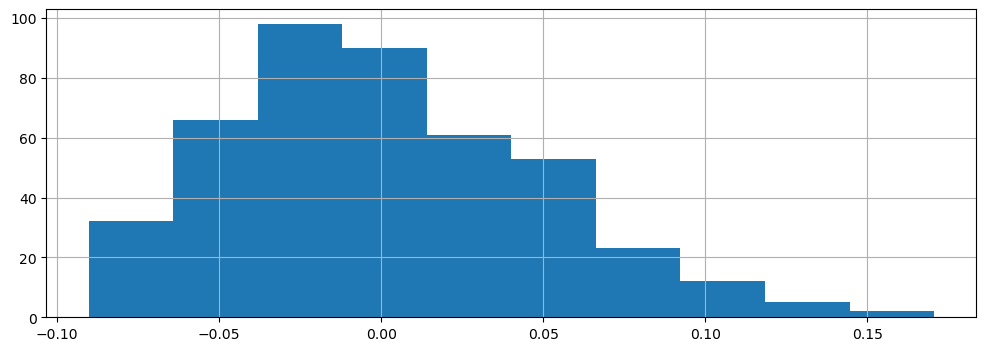

In [15]:
diabetes_X.loc[:,"bmi"].hist() # Continuous Feature

[ 0.05068012 -0.04464164]


<Axes: >

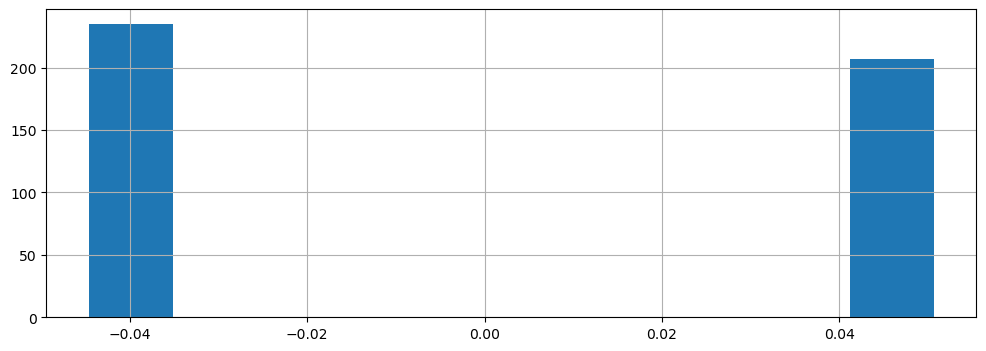

In [16]:
print(diabetes_X.loc[:, "sex"].unique()) #District Feature
diabetes_X.loc[:,"sex"].hist()

## Risk Score

<Axes: xlabel='Diabetes risk score', ylabel='Number of patients'>

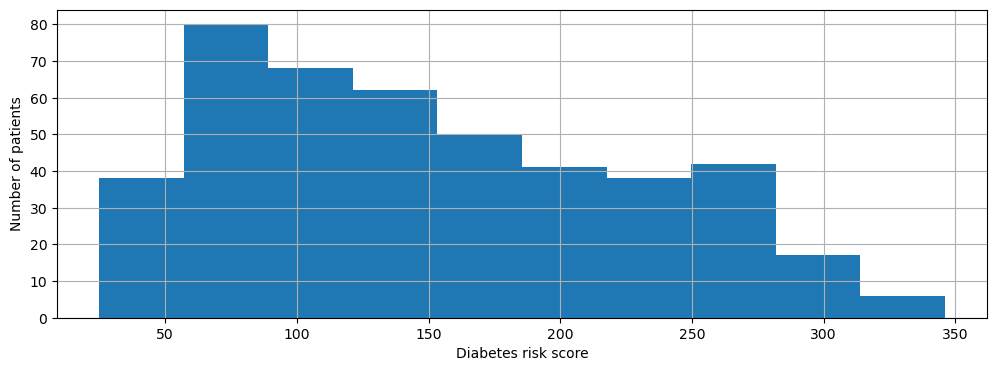

In [17]:
plt.xlabel("Diabetes risk score")
plt.ylabel("Number of patients")
diabetes_y.hist()

**Regression (Regresyon)**
Tanım:
Regresyon problemlerinde hedef değişken (𝑦) sürekli (continuous) bir değerdir. Bu, sayısal bir değer olduğu anlamına gelir (örneğin, bir evin fiyatı, sıcaklık, stok fiyatı gibi). Model, veri kümesinin genel yapısını temsil eden bir eğri (curve) öğrenmeye çalışır.

Amaç:
<br>
Tahmin yapmak. Bir noktayı belirli bir doğrulukla sayısal olarak tahmin eder.
<br>
-Bir kişinin gelirini tahmin etmek.<br>
-Bir evin fiyatını tahmin etmek.

Örnek:
-Girdi: Ev büyüklüğü (metrekare), oda sayısı.<br>
-Hedef: Ev fiyatı.<br>
Burada model, bu özelliklere dayalı bir eğri (örneğin bir doğrusal regresyon çizgisi) öğrenir ve bu eğriyi kullanarak fiyatı tahmin eder.

**Classification (Sınıflandırma)**
Tanım:
Sınıflandırma problemlerinde hedef değişken (𝑦) ayrık (discrete) bir değerdir. Bu, verinin önceden tanımlanmış sınıflardan birine ait olduğunu ifade eder (örneğin, "evet" veya "hayır", "kedi" veya "köpek"). Model, sınıfları ayıran bir hiperplan (hyperplane) öğrenmeye çalışır.

Amaç:
<br>
Etiketleme. Bir veriyi doğru sınıfa atamak. 
<br>
-Bir e-postanın spam olup olmadığını sınıflandırmak.
<br>
-Bir hastalığın teşhisini koymak (örneğin "hasta" veya "sağlıklı").

Örnek:

-Girdi: Yaş, cinsiyet, kan test sonuçları.<br>
-Hedef: Hasta "diyabet" mi, "değil" mi?<br>
Burada model, veriyi iki sınıfa ayıran bir hiperplan (örneğin doğrusal bir ayırıcı çizgi) öğrenir.



Text(0, 0.5, 'Diabetes Risk')

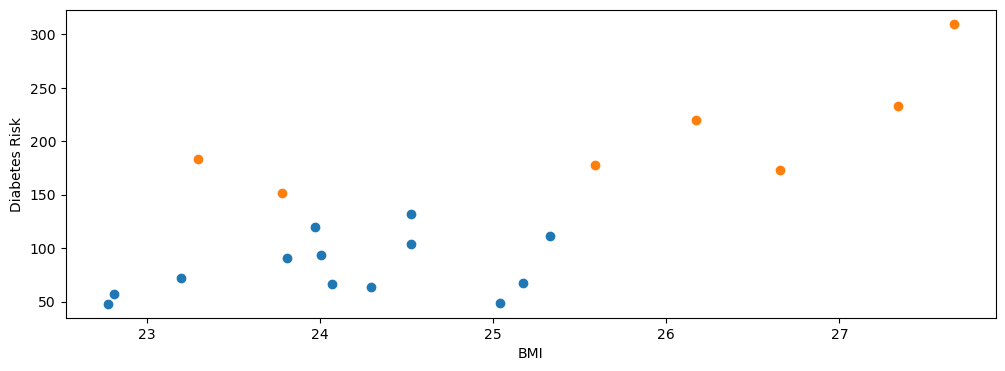

In [18]:
import matplotlib.pyplot as plt

# Sadece eğitim verisini ayrıştırmak için discretization
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Discrete kategorilere göre scatter plot
plt.scatter(diabetes_X_train[diabetes_y_train_discr == 0], diabetes_y_train[diabetes_y_train_discr == 0], label="Low-Risk Patients")
plt.scatter(diabetes_X_train[diabetes_y_train_discr == 1], diabetes_y_train[diabetes_y_train_discr == 1], label="High-Risk Patients")

plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")





Grafikler, şeker hastalığı riski (diabetes risk) ile bireylerin vücut kitle indeksini (BMI) ilişkilendiren analizleri temsil etmektedir. Veriler, şeker riski 150'nin altında olanlar "Low-Risk Patients" (yeşil noktalar), 150'nin üzerinde olanlar ise "High-Risk Patients" (kırmızı noktalar) olarak sınıflandırılmıştır. Modelin tahminleri ise mavi çarpılar (low-risk predictions) ve turuncu çarpılar (high-risk predictions) ile görselleştirilmiştir. Gerçek sınıflar (yeşil ve kırmızı noktalar) ile tahmin edilen sınıfların (mavi ve kahverengi çarpılar) uyumuna bakılarak modelin doğruluğu değerlendirilmiştir. 

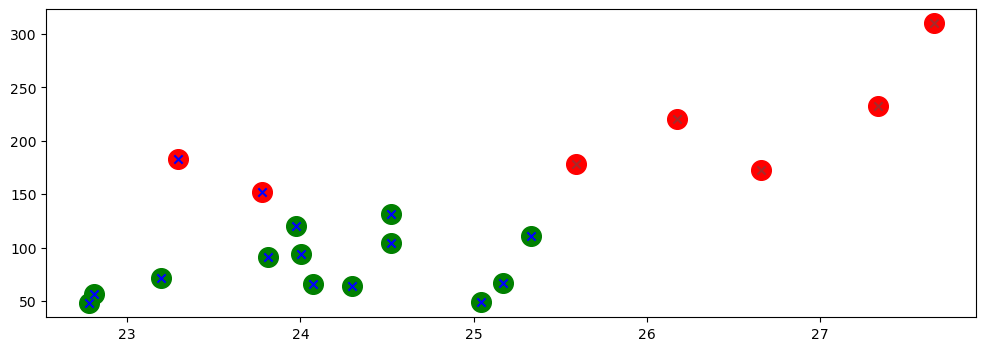

In [19]:
clf=linear_model.LogisticRegression()

clf.fit(diabetes_X_train,diabetes_y_train_discr)

diabetes_y_train_pred=clf.predict(diabetes_X_train)


plt.scatter(diabetes_X_train[diabetes_y_train_discr == 0], 
            diabetes_y_train[diabetes_y_train_discr == 0], 
            color='green', label="Low-Risk Patients",s=200)

plt.scatter(diabetes_X_train[diabetes_y_train_discr == 1], 
            diabetes_y_train[diabetes_y_train_discr == 1], 
            color='red', label="High-Risk Patients",s=200)

plt.scatter(diabetes_X_train[diabetes_y_train_pred == 0], 
            diabetes_y_train[diabetes_y_train_pred == 0], 
            color='blue', marker='x', label="Low-Risk Predictions")

plt.scatter(diabetes_X_train[diabetes_y_train_pred == 1], 
            diabetes_y_train[diabetes_y_train_pred == 1],
            color='brown', marker='x', label="High-Risk Predictions")

## Denetimli Makine Öğrenimi Algoritmasının Bileşenleri

Denetimli öğrenme algoritmaları, üç temel bileşenden oluşur:

1. **Model Sınıfı**:  
   Algoritmanın değerlendirdiği tüm olası modellerin kümesidir. Bu modeller, verilerden öğrenilebilecek ilişkileri tanımlar ve hipotez uzayını temsil eder.

2. **Amaç Fonksiyonu**:  
   Belirli bir modelin ne kadar iyi olduğunu değerlendiren matematiksel bir fonksiyondur. Eğitim verilerindeki gerçek sonuçlarla modelin tahminleri arasındaki hatayı veya kaybı ölçer.

3. **Optimizasyon Yöntemi**:  
   Model sınıfı içerisindeki en iyi modeli bulmak için kullanılan mekanizmadır. Amaç fonksiyonunu en aza indirmeyi hedefleyerek, verilen veriler için en doğru tahminleri yapan modeli belirler.

Bu bileşenler bir araya gelerek, denetimli makine öğrenimi modellerini doğru tahminler yapacak şekilde eğitir.


## Model ve Model Sınıfı: Matematiksel Gösterim

### Model
Bir **model**, giriş değerlerini (**X**) alarak hedef değerlerine (**Y**) dönüştüren bir fonksiyondur:  
**f: X → Y**  

Eğer model parametrelerle tanımlanmışsa, bu şu şekilde gösterilir:  
**f_θ(x) → Y**  
Burada:
- **θ (theta)**: Modelin parametrelerini ifade eder.
- Model, θ parametrelerine dayalı olarak girişlerden hedeflere dönüşüm yapar.

---

### Model Sınıfı
Bir **model sınıfı**, olası tüm modellerin kümesidir. Bu modeller, girişlerden hedeflere dönüşüm yapan fonksiyonlardır:  
**M ⊆ {f | f: X → Y}**

Eğer modeller parametrelerle tanımlanmışsa, model sınıfı şu şekilde ifade edilir:  
**M = {f_θ | f: X → Y; θ ∈ bigθ}**  
Burada:
- **f_θ**: Modelin parametreli versiyonudur.
- **bigθ**: Tüm olası parametre değerlerinin kümesidir.


## Amaç Fonksiyonu (Objective Function)

### Tanım
Amaç fonksiyonu, bir modelin veri üzerinde ne kadar iyi çalıştığını ölçen bir fonksiyondur.  
**J(f): M → [0, ∞)**  
- **M**: Model sınıfını ifade eder.  
- **[0, ∞)**: Amaç fonksiyonunun pozitif değerler döndürdüğünü gösterir (daha küçük değerler daha iyi uyumu temsil eder).  

Eğer model parametrelerle tanımlanmışsa, amaç fonksiyonu şu şekilde ifade edilir:  
**J(θ): Θ → [0, ∞)**  
- **Θ**: Tüm olası parametre değerlerinin kümesi.

---

### Örnek Amaç Fonksiyonları

#### 1. Ortalama Kare Hata (Mean Squared Error)
Bu kayıp fonksiyonu, tahmin ile gerçek değer arasındaki farkın karesini kullanır.  
**Formül:**  
**J(θ) = (1 / 2n) Σ(ftheta(x^(i)) – y^(i))²**  
- **n**: Veri kümesindeki örnek sayısı.  

#### 2. Mutlak Hata (Absolute Error)
Bu kayıp fonksiyonu, farkların mutlak değerini kullanır.  
**Formül:**  
**J(θ) = (1 / n) Σ|fθ(x^(i)) – y^(i)|**  

Bu yöntem, uç değerlere karşı daha dayanıklıdır.


In [20]:
y1=np.array([1,2,3,4])
y2=np.array([-1,1,3,5])

print("MSE: %.2f", mean_squared_error(y1,y2))
print("MAE: %.2f", mean_absolute_error(y1,y2))

MSE: %.2f 1.5
MAE: %.2f 1.0


1. **Optimizasyon Amacı:**
   - Modelin parametrelerini (örneğin, doğrusal regresyonda eğim ve kesişim noktası) öğrenmek için, modelin yaptığı hataları minimize ederiz.
   - \( \theta \), modelin bu öğrenilecek parametrelerini ifade eder.

2. **Adımlar:**
   - Her bir veri noktası için, tahmin edilen değer (f_theta(x^(i))) ile gerçek hedef değeri (y^(i)) arasındaki fark bulunur.
   - Bu farkın karesi alınır (büyük hatalar daha çok cezalandırılır).
   - Tüm hatalar toplanarak veri kümesindeki toplam veri noktası sayısına (n) bölünür.
   - Sonuç, optimizasyon sürecini kolaylaştırmak için 1/2 ile çarpılır.

3. **Sonuç:**
   - MSE kaybı ne kadar küçük olursa, model o kadar iyi öğrenmiş demektir.
---

### Modelin Uygunluğunu Ölçme:
Model eğitildikten sonra performansı şu şekilde değerlendirilir:
- **Eğitim Seti:** Modelin, eğitildiği veri üzerinde ne kadar iyi çalıştığını gösterir.
- **Test Seti:** Modelin, daha önce görmediği verilere ne kadar iyi genelleme yaptığını gösterir.

In [21]:
diabetes_X_train=diabetes_X.iloc[-20:]
diabetes_y_train=diabetes_y.iloc[-20:]

regr=linear_model.LinearRegression()

regr.fit(diabetes_X_train,diabetes_y_train)

diabetes_y_train_pred=regr.predict(diabetes_X_train)

diabetes_X_test=diabetes_X.iloc[:3]
diabetes_y_test=diabetes_y.iloc[:3]

diabetes_y_test_pred=regr.predict(diabetes_X_test)

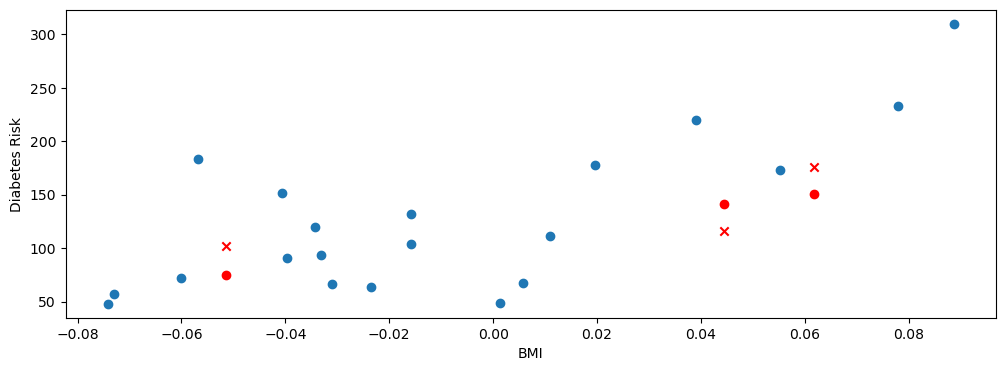

In [22]:
plt.xlabel("BMI")
plt.ylabel("Diabetes Risk")

plt.scatter(diabetes_X_train.loc[:,["bmi"]],diabetes_y_train,label="a")
plt.scatter(diabetes_X_test.loc[:,["bmi"]],diabetes_y_test,color="red",marker="o")

plt.scatter(diabetes_X_test.loc[:,["bmi"]],diabetes_y_test_pred,marker="x",color="red")
                                